In [1]:
import numpy as np
import torch

In [2]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [3]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [4]:
inputs=torch.from_numpy(inputs)
targets=torch.from_numpy(targets)

In [5]:
lr=0.001
epochs=1000

Initialize weights and biases.
We have three dimensions of inputs and 2 dimensions of outputs.
So we want the weight matrix to be in the shape that if we multiply n X 3 matrix by 3 X 2 to get n X 2 matrix. So w transpose will be of 2 X 3. 

In [6]:
weights=torch.randn(2,3,requires_grad=True)
bias=torch.randn(2, requires_grad=True)

`@` represents matrix multiplication in PyTorch, and the `.t` method returns the transpose of a tensor.
The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

`torch.sum` returns the sum of all the elements in a tensor. The `.numel` method of a tensor returns the number of elements in a tensor. Let's compute the mean squared error for the current predictions of our model.

In [7]:
def predict(x,w,b):
    return x @ w.t() + b
def loss_func(predicted,targets):
    diff=predicted-targets
    return torch.sum(diff*diff)/diff.numel()

In [8]:
store=[]
for _ in range(epochs+1):
    y=predict(inputs,weights,bias)
    loss=loss_func(y,targets)
    loss.backward()
    with torch.no_grad():
        weights-= weights*lr
        bias-=bias*lr
        weights.grad.zero_()
        bias.grad.zero_()
    store.append(np.sqrt(loss.item()))

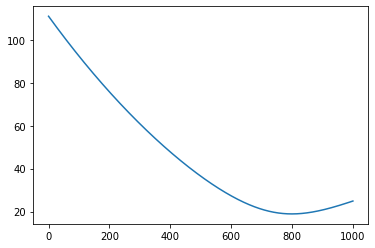

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(store)